In [1]:
## The imports 
import numpy as np
from PIL import Image 
import cv2
from matplotlib import pyplot as plt

In [2]:
#The Defines
BEAN_PATH = 'images/bean.png'
NUM_COLOR = 256

In [3]:
## Functions
def draw_histogram(img, title): # This function by getting the image will return a historam to us
    hist = np.zeros(NUM_COLOR)
    x = np.arange(NUM_COLOR)
    rows, cols = img.shape
    for row in range(rows):
        for col in range(cols):
            hist[img[row, col]] += 1
    plt.stem(x, hist, use_line_collection = True)
    plt.title(title)
    plt.show()
    return hist

def cal_sum_hist(histo): # This function works like the CDF of a distributed variable and calculates the sum
    S = np.zeros(len(histo))
    for i in range(len(S)):
        S[i] = np.sum(histo[0:i+1])
    return S

In [4]:
# Reading the image
Bean_img = cv2.imread(BEAN_PATH, 0) 

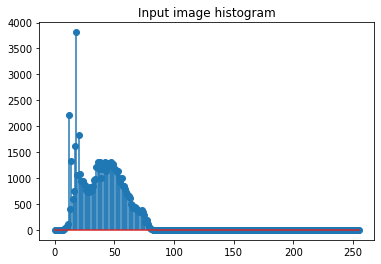

In [5]:
# Drawing the histogram of the image
Hist = draw_histogram(Bean_img, "Input image histogram")

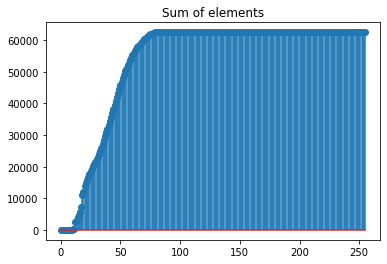

In [6]:
# ploting the sum of the total pixels in the image
x = np.arange(NUM_COLOR)
S = cal_sum_hist(Hist)
plt.stem(x, S, use_line_collection = True)
plt.title("Sum of elements")
plt.show()

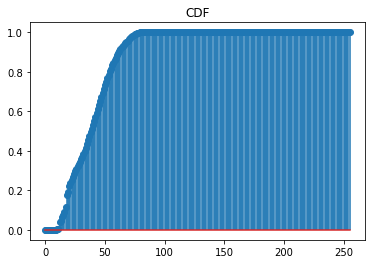

In [7]:
# ploting the CDF of the distributed variable
Prob = S / (Bean_img.shape[0] * Bean_img.shape[1])
plt.stem(x, Prob, use_line_collection = True)
plt.title("CDF")
plt.show()

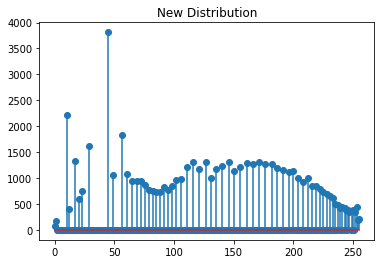

In [8]:
# after applying the histogram method we plot the new histogram
round_up = np.round((NUM_COLOR - 1) * Prob)
New_dist = np.zeros(NUM_COLOR)
for i in range(len(round_up)): # This for will make the new histogram
    New_dist[int(round_up[i])] += Hist[i]
    
plt.stem(x, New_dist, use_line_collection = True)
plt.title("New Distribution")
plt.show()

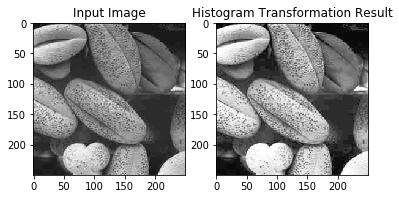

In [11]:
rows, cols = Bean_img.shape
New_image = np.zeros((rows, cols))
# after that we know the CDF the distribution and using that no declar what should be every pixel new value
for row in range(rows):
    for col in range(cols):
        New_image[row, col] = round_up[Bean_img[row, col]]
        
# we will plot the new image 
plt.subplot(121),plt.imshow(Bean_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(New_image, cmap = 'gray')
plt.title('Histogram Transformation Result')
plt.show()